In [1]:
import fitz

In [2]:
filepath = r'C:\Users\louis\OneDrive - McGill University\Kurling4Kids\Data\REP-EDC-2020_Fusion_Final-1-5.pdf'

In [3]:
##
# Get the entire file as string
##
text = ''
with fitz.open(filepath) as doc:
    for page in doc:
        text += page.get_text()

In [4]:
type(text)

str

In [5]:
print(text[0:700])

 
           Entreprises donatrices et commanditaires du Québec 
 
 
 
 
    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. 
 
Tous droits réservés © 2020– Centre québécois de philanthropie 
1
 
 
 
 
 
 
 
 
 
 
 
 
 
 
1    3M Canada inc.  
7290, rue Frederick Banting  
Saint-Laurent QC  H4T1Z2   
Secteur industriel : Équipement et services industriels; Fabrication 
de peintures, de revêtements et de rubans adhésifs, abrasifs, 
produits de soins de santé et télécommunications.   
Langue de comm.: Français 
DDD(1) : En tout temps  FAF : 31 décembre 



In [6]:
##
# Get blocks instead, allows for list ordering
##
blocks = [] #have to use a list
with fitz.open(filepath) as doc:
    for page in doc:
        blocks += page.get_text("blocks")

In [7]:
print(type(blocks))
print(len(blocks))

<class 'list'>
163


In [8]:
blocks[:5]

[(71.99996948242188,
  36.033119201660156,
  559.9302368164062,
  54.59596252441406,
  ' \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n',
  0,
  0),
 (53.999977111816406,
  730.2886352539062,
  559.5663452148438,
  738.2749633789062,
  "    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \n",
  1,
  0),
 (200.39991760253906,
  741.0960083007812,
  431.97698974609375,
  751.5,
  'Tous droits réservés © 2020– Centre québécois de philanthropie \n',
  2,
  0),
 (569.8797607421875,
  35.822723388671875,
  576.0062255859375,
  48.60703659057617,
  '1\n',
  3,
  0),
 (53.999977111816406,
  71.72286987304688,
  170.01712036132812,
  186.6115264892578,
  ' \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \n',
  4,
  0)]

The first four elements in the nested tuple are the float coordinates of the box. The last two are the box type and box number (not sure of order yet, documentation says element 6 is block type and 7 block number but seems to be opposite

Blocks 3,4,5,6,7 correspond to the start of the first entry in the pdf.

In [9]:
blocks[3][4]

'1\n'

In [10]:
blocks[4][4]

' \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \n'

In [11]:
blocks[5][4]

'Secteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \n'

In [12]:
blocks[6][4]

'N° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \n'

In [13]:
blocks[7][4]

"Domaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \n"

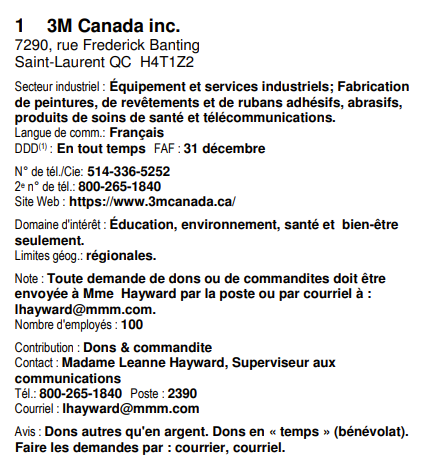


In [14]:
for i, b in enumerate(blocks[:20]):
    print(str(i) + " :::: " + repr(b[4]))

0 :::: ' \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n'
1 :::: "    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \n"
2 :::: 'Tous droits réservés © 2020– Centre québécois de philanthropie \n'
3 :::: '1\n'
4 :::: ' \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \n'
5 :::: 'Secteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \n'
6 :::: 'N° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \n'
7 :::: "Domaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimit

The blocks are note well made. Entry #2 starts in the same block as the end of entry #1 (block 10).

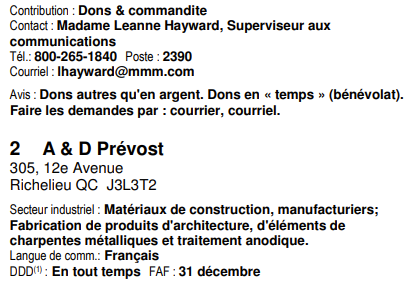

It does seem that every new entry starts with string "\n \n \nX    " (4 spaces) where X is the number of the entry, however. Use that to separate?

In [15]:
text[:500]

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels;"

In [16]:
#With the whole text:
split_text = text.split(" \n \n \n1    ") #Splitting without the 4 end spaces creates 16 elements, this creates 2
#But hyper specific to particular format of this document
len(split_text)

2

In [17]:
split_text[0]

" \n           Entreprises donatrices et commanditaires du Québec \n \n \n \n \n    « DDD » : Date de distribution des dons. « FAF » : date de fin d'année fiscale.  « Langue : B »  dans l’inscription d’une fondation indique que vous pouvez écrire en français ou en anglais. \n \nTous droits réservés © 2020– Centre québécois de philanthropie \n1\n \n \n \n \n \n \n \n \n \n \n \n"

In [18]:
split_text[1][:100]

'3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équi'

In [19]:
#Try with n2
split_text = text.split(" \n \n \n2    ")
print(len(split_text))

#Try with n3
split_text = text.split(" \n \n \n3    ")
print(len(split_text))

2
2


In [20]:
split_text[0][-100:]

'chitectural.com   \nAvis : Faire les demandes par : courrier. \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n'

In [21]:
split_text[1][:100]

"AAR Aicraft - Services Trois-Rivières  \n3750, chemin de l'aéroport  \nTrois-Rivières  QC  G9B2N8   \nS"

This method has a problem with overlap of lists: can solve by subtracting difference in lengths of string?

In [22]:
split_text_1 = text.split(" \n \n \n1    ")
split_text_2 = text.split(" \n \n \n2    ")
split_text_3 = text.split(" \n \n \n3    ")
split_text_4 = text.split(" \n \n \n4    ")

In [23]:
print(len(split_text_1[0]))
print(len(split_text_2[0]))
print(len(split_text_3[0]))

358
1345
2303


In [24]:
useless_text = split_text_1[0]
org1 = split_text_2[0][len(split_text_1[0]):]
org2 = split_text_3[0][len(split_text_2[0]):]
org3 = split_text_4[0][len(split_text_3[0]):]

In [25]:
org1

" \n \n \n1    3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit être \nenvoyée à Mme  Hayward par la poste ou par courriel à : \nlhayward@mmm.com. \nNombre d'employés : 100 \nContribution : Dons & commandite \nContact : Madame Leanne Hayward, Superviseur aux \ncommunications  \nTél.: 800-265-1840  Poste : 2390    \nCourriel : lhayward@mmm.com  \nAvis : Dons autres qu'en argent. Dons en « temps » (bénévolat). \nFaire les demandes par : cour

In [26]:
org2

" \n \n \n2    A & D Prévost  \n305, 12e Avenue  \nRichelieu QC  J3L3T2   \nSecteur industriel : Matériaux de construction, manufacturiers; \nFabrication de produits d'architecture, d'éléments de \ncharpentes métalliques et traitement anodique.  \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 450-658-8771   N° de fax/Cie: 450-658-0077 \n2e n° de tél.: 800-361-4433 \nCourriel / Cie :  info@prevost-architectural.com  \nSite Web : www.adprevost.ca  \nDomaine d'intérêt : Cancer, hôpitaux, maladies du coeur et  santé.  \nLimites géog.: locales.  \nNombre d'employés : 200 \nContribution : Dons \nContact : Monsieur Claude Cardin, Président   \nTél.: 450-658-8771  Fax : 450-658-0077   \n2e contact pour : Dons  \nMadame Marie-Josée Dery, Coordonnatrice Capital Humain \nTél.: 450-658-8771  Fax : 450-658-0077  \nCourriel : mjdery@prevost-architectural.com   \nAvis : Faire les demandes par : courrier. \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \

In [27]:
org3

" \n \n \n3    AAR Aicraft - Services Trois-Rivières  \n3750, chemin de l'aéroport  \nTrois-Rivières  QC  G9B2N8   \nSecteur industriel : Offre des services d'entretien, de réparation et \nde révision (MRO) d'aéronefs.  Langue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 819-377-4500   N° de fax/Cie: 819- 668-8811 \nCourriel / Cie : comptabilite@aarcorp.com  \nSite Web : https://www.aarcorp.com  \nDomaine d'intérêt : Éducation, Santé, Bien-être, Vétérans.  \nLimites géog.: nationales.  \nNote : Envoyer votre demande de dons par  courriel à  \nMme Vautour, Adjoint au V.P. des opérations à :  \nelizabeth.vautour@aarcorp.com. \nNombre d'employés : 340 \nContribution : Dons \nContact : Madame Elizabeth Vautour, Adjointe exécutive au vice-\nprésident des opérations  \nTél.: 819-377-4500  Poste : 3201    \nCourriel : elizabeth.vautour@aarcorp.com  \nAvis : Faire les demandes par : courriel."

Seems to work, can try doing this with a loop. Probably exceedingly inefficient lol

In [36]:
num_orgs = 23
all_splits = []

for i in range(1, num_orgs+1):
    
    if i > num_orgs:
        break
        
    temp_split_1 = text.split(f" \n \n \n{i}    ")
    temp_split_2 = text.split(f" \n \n \n{i+1}    ")
    
    all_splits.append(temp_split_2[0][len(temp_split_1[0]) + len(f" \n \n \n{i}    "):])

In [37]:
all_splits[0]

"3M Canada inc.  \n7290, rue Frederick Banting  \nSaint-Laurent QC  H4T1Z2   \nSecteur industriel : Équipement et services industriels; Fabrication \nde peintures, de revêtements et de rubans adhésifs, abrasifs, \nproduits de soins de santé et télécommunications.   \nLangue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-336-5252    \n2e n° de tél.: 800-265-1840 \nSite Web : https://www.3mcanada.ca/  \nDomaine d'intérêt : Éducation, environnement, santé et  bien-être \nseulement.  \nLimites géog.: régionales.  \nNote : Toute demande de dons ou de commandites doit être \nenvoyée à Mme  Hayward par la poste ou par courriel à : \nlhayward@mmm.com. \nNombre d'employés : 100 \nContribution : Dons & commandite \nContact : Madame Leanne Hayward, Superviseur aux \ncommunications  \nTél.: 800-265-1840  Poste : 2390    \nCourriel : lhayward@mmm.com  \nAvis : Dons autres qu'en argent. Dons en « temps » (bénévolat). \nFaire les demandes par : courrier, courriel

In [38]:
all_splits[-1]

"Aéroports de Montréal  \n800, pl. Leigh-Capreol, bur. 1000  \nDorval QC  H4Y0A5   \nNbre de succ.: 1  Filiale de : Aéroports de Montréal Capital  \nSecteur industriel : Services publics; Administration \ngouvernementale. Gestion aéroportuaire. Transport et \nentreposage.  Langue de comm.: Français \nDDD(1) : En tout temps  FAF : 31 décembre \nN° de tél./Cie: 514-394-7200   N° de fax/Cie: 514-394-7356 \n2e n° de tél.: 800-465-1213 \nCourriel / Cie : affaires.publiques@admtl.com  \nSite Web : www.admtl.com  \nDomaine d'intérêt : Environnement, organismes  communautaires.  \nLimites géog.: régionales.  \nNombre d'employés : 625 \nContribution : Dons & commandite \nContact : Monsieur Martin Massé, Vice-président Affaires \npubliques et Communications  \nTél.: 514-394-7200  Fax : 514-394-7356  \nCourriel : affaires.publiques@admtl.com  \nAvis : Faire les demandes par : courrier, courriel, fax. \n \n \n"

In [55]:
all_splits[5]

"AbbVie  \n8401, rte Transcanadienne  \nSaint-Laurent Québec  H4S1Z1   \nSecteur industriel : Produits pharmaceutiques et biotechnologiques; \nAbbVie est une entreprise américaine spécialisée dans la  \nrecherche pharmaceutique. Langue de comm.: Anglais  \nN° de tél./Cie: 514-906-9700   N° de fax/Cie: 888-704-8266 \n2e n° de tél.: 888-703-3006 \nSite Web : http://www.abbvie.ca/fr/index.html  \nDomaine d'intérêt : Maladies tropicales, négligées et  dangereuses, \néducation, animaux.   \nNote : The AbbVie Foundation, a non-profit charitable \norganization, supports advancing progress against NTDs with  \nits $3 million combined commitment. \nContribution : Dons \nContact : Monsieur Stéphane Lassignardie, Directeur général   \nTél.: 888-779-0333     \nAvis : Faire les demandes par : courrier. \n \nL'entreprise possède une fondation corporative :  \n \nAbbVie, Fondation \n8401, rte Trans-Canadienne \nSaint-Laurent QC H4S1Z1 \nLangue : F Catégorie : Fondation corporaative \nContact : Direct

From there can extract whatever we want from the blocks! :)

In [50]:
org_dict = {
}

for i, org in enumerate(all_splits):
    
    temp_dict = {}
    #Get the ids -> use index of all_splits list
    temp_dict["id"] = i+1
    
    #Get the names -> names are at start, end by newline \n
    temp_dict["name"] = org.split("\n")[0]

    #Get the addresses -> addresses follow names, 2 newlines
    temp_dict["address"] = org.split("\n")[1:3]

    org_dict[i] = temp_dict

In [51]:
org_dict

{0: {'id': 1,
  'name': '3M Canada inc.  ',
  'address': ['7290, rue Frederick Banting  ', 'Saint-Laurent QC  H4T1Z2   ']},
 1: {'id': 2,
  'name': 'A & D Prévost  ',
  'address': ['305, 12e Avenue  ', 'Richelieu QC  J3L3T2   ']},
 2: {'id': 3,
  'name': 'AAR Aicraft - Services Trois-Rivières  ',
  'address': ["3750, chemin de l'aéroport  ",
   'Trois-Rivières  QC  G9B2N8   ']},
 3: {'id': 4,
  'name': 'ABB (Albert Bob Bob)  ',
  'address': ['(anc. Baldor Electric Canada Inc.)  ', '800 boul. Hymes  ']},
 4: {'id': 5, 'name': '', 'address': []},
 5: {'id': 6,
  'name': 'AbbVie  ',
  'address': ['8401, rte Transcanadienne  ',
   'Saint-Laurent Québec  H4S1Z1   ']},
 6: {'id': 7,
  'name': 'ABS, Groupe ',
  'address': ['7950, Vauban  ', 'Montréal QC  H1J2X5   ']},
 7: {'id': 8,
  'name': 'ACCEO Solutions  ',
  'address': ['75, rue Queen, bur. 6100  ', 'Montréal QC  H3C2N6   ']},
 8: {'id': 9, 'name': '', 'address': []},
 9: {'id': 10,
  'name': 'Acier AGF  ',
  'address': ['2270, rue Garn

In [45]:
len(all_splits)

23